# Executive Summary
<br />
1. We found that the average unemployment rate over the last five years was decreasing prior to 2020, despite the increase in population. We also found that the unemployment rate follows the same trend over the months of each year. The unemployment rate increased in 2020, presumeably due to covid, but has started to decrease again in 2021. <br />
<br />
2. We found that the average unemployment rate of each race was decreasing prior to 2020. Black or African American had the highest unemployment rate and the Asian unemployment rate was generally the lowest. The white unemployment rate followed the national unemployment rate very closely with a correlation of .998. The Asian unemploymment rate had a correlation of .974 and the Black or African American unemployment rate had a correlation of .971. The unemployment rate for each race did not account for the primary industy of each race. The final two races, Native American/Alaskan Native and Native Hawaiian/Pacific Islander, were not included in our analysis because of the lack of data. 

## 1. Unemployment Rate

How has unemployment changed in the last 5 years?

In [1]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#Create a base url for the API
base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/{}?&startyear=2016&endyear=2021'

#### National Unemployment Rate

In [2]:
#Pull unemployment rate data from API
unemploy_req = requests.get(base_url.format('LNU04000000'))
unemploy_data = unemploy_req.json()

In [3]:
#Create a list to hold json unemployment rate data
unemployed = {
    'Year': [],
    'Month': [],
    'Unemployment Rate': []
}

#Loops through the json unemployment rate data and adds the data to the created list
for i in range(len(unemploy_data['Results']['series'][0]['data'])):
    unemployed['Year'].append(int(unemploy_data['Results']['series'][0]['data'][i]['year']))
    unemployed['Month'].append(str(unemploy_data['Results']['series'][0]['data'][i]['periodName']))
    unemployed['Unemployment Rate'].append(float(unemploy_data['Results']['series'][0]['data'][i]['value']))

#### Population Data

In [4]:
#Pull population data from API
pop_req = requests.get(base_url.format('LNU00000000'))
pop_data = pop_req.json()

In [5]:
#Create a list to hold json population data
pop = {
    'Year': [],
    'Month': [],
    'Population': []
}

#Loops through the json population data and adds the data to the list to the created list
for i in range(len(pop_data['Results']['series'][0]['data'])):
    pop['Year'].append(int(pop_data['Results']['series'][0]['data'][i]['year']))
    pop['Month'].append(str(pop_data['Results']['series'][0]['data'][i]['periodName']))
    pop['Population'].append(float(pop_data['Results']['series'][0]['data'][i]['value']))

In [6]:
#Combines the unemployment data list and the population data list
unemployed_pop = unemployed | pop

#Creates a dataframe from the combined unemployment and population data list
unemployment_population = pd.DataFrame(unemployed_pop)

### Unemployment Rate Graphs

In [7]:
#Creates a list of the months
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Groups the unemployment population data by year and month
unemployment_year_month = unemployment_population.groupby(['Year', 'Month']).mean()

#Uses the list of months to sort the employment population data by month
unemployment_year_month = unemployment_year_month.reindex(order, level='Month')
unemployment_year_month.reset_index(level='Month', inplace = True)

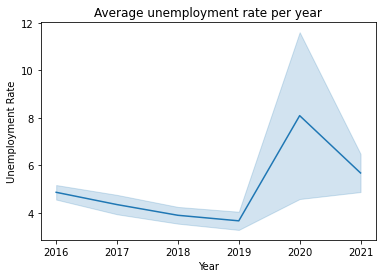

In [8]:
#Creates a line graph of the average rate of unemployment each year
fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Unemployment Rate', data=unemployment_population, ci='sd', ax=ax)
ax.set_title('Average unemployment rate per year')
plt.savefig('plots/unemployment_rate_per_year.png')
plt.show()

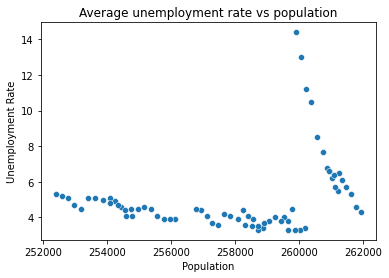

In [9]:
#Creates a scatterplot comparing the population level to the unemployment rate
fig, ax = plt.subplots()
sns.scatterplot(x='Population', y='Unemployment Rate', data=unemployment_population, ax=ax)
ax.set_title('Average unemployment rate vs population')
plt.savefig('plots/unemployment_rate_vs_population.png')
plt.show()

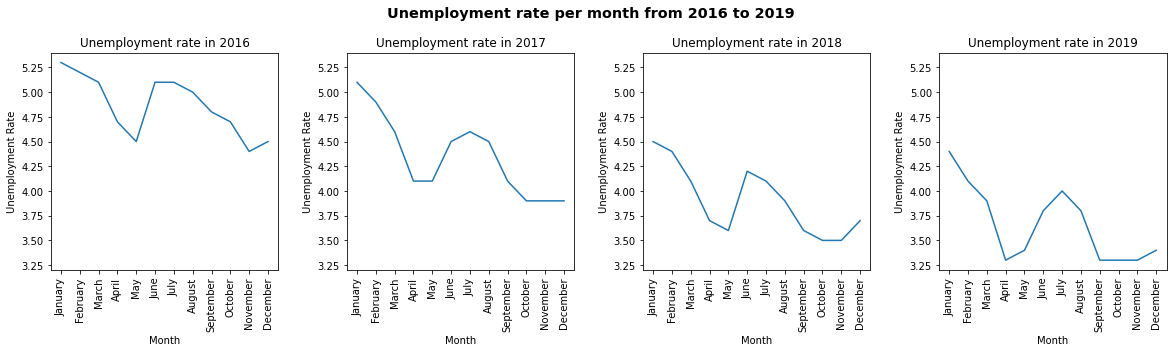

In [10]:
#Creates 4 subplots to show the unemployment rate for each month for the years 2016 to 2019
#The years 2020 and 2021 skewed the data
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(20, 4), gridspec_kw={'wspace':0.3,'hspace':0.3})
unemployment_year_month[unemployment_year_month.index == 2016].plot(ax=axes[0], x='Month', y='Unemployment Rate', title='Unemployment rate in 2016', legend=False, xticks=range(0, 12, 1), rot=90)
unemployment_year_month[unemployment_year_month.index == 2017].plot(ax=axes[1], x='Month', y='Unemployment Rate', title='Unemployment rate in 2017', legend=False, xticks=range(0, 12, 1), rot=90)
unemployment_year_month[unemployment_year_month.index == 2018].plot(ax=axes[2], x='Month', y='Unemployment Rate', title='Unemployment rate in 2018', legend=False, xticks=range(0, 12, 1), rot=90)
unemployment_year_month[unemployment_year_month.index == 2019].plot(ax=axes[3], x='Month', y='Unemployment Rate', title='Unemployment rate in 2019', legend=False, xticks=range(0, 12, 1), rot=90)

#Shows the y-axis ticks for every subplot
axes[0].tick_params(axis='y', labelleft=True)
axes[1].tick_params(axis='y', labelleft=True)
axes[2].tick_params(axis='y', labelleft=True)
axes[3].tick_params(axis='y', labelleft=True)

#Shows the y-axis label for every subplot
axes[0].set_ylabel('Unemployment Rate').set_visible(True)
axes[1].set_ylabel('Unemployment Rate').set_visible(True)
axes[2].set_ylabel('Unemployment Rate').set_visible(True)
axes[3].set_ylabel('Unemployment Rate').set_visible(True)

#Adds a title to the graph
plt.suptitle('Unemployment rate per month from 2016 to 2019', y=1.04, weight='semibold', size='x-large')

#Save the figure
plt.savefig('plots/unemployment_rate_per_year_month.png')
plt.show()

## 2. Unemployment Rate by Race

How does race affect unemployment?

#### Black or African American Unemployment Rate Data

In [11]:
#Pull black or african american unemployment rate data from API
black_req = requests.get(base_url.format('LNU04000006'))
black_data = black_req.json()

In [12]:
#Create a list to hold json black or african american unemployment rate data
black_unemploy = {
    'Year': [],
    'Month': [],
    'Black Unemployment Rate': []
}

#Loops through the json black or african american unemployment rate data and adds the data to the created list
for i in range(len(black_data['Results']['series'][0]['data'])):
    black_unemploy['Year'].append(int(black_data['Results']['series'][0]['data'][i]['year']))
    black_unemploy['Month'].append(str(black_data['Results']['series'][0]['data'][i]['periodName']))
    black_unemploy['Black Unemployment Rate'].append(float(black_data['Results']['series'][0]['data'][i]['value']))

#### White Unemployment Rate Data

In [13]:
#Pull white unemployment rate data from API
white_req = requests.get(base_url.format('LNU04000003'))
white_data = white_req.json()

In [14]:
#Create a list to hold json white unemployment rate data
white_unemploy = {
    'Year': [],
    'Month': [],
    'White Unemployment Rate': []
}

#Loops through the json white unemployment rate data and adds the data to the created list
for i in range(len(white_data['Results']['series'][0]['data'])):
    white_unemploy['Year'].append(int(white_data['Results']['series'][0]['data'][i]['year']))
    white_unemploy['Month'].append(str(white_data['Results']['series'][0]['data'][i]['periodName']))
    white_unemploy['White Unemployment Rate'].append(float(white_data['Results']['series'][0]['data'][i]['value']))

#### Asian Unemployment Rate Data

In [15]:
#Pull asian unemployment rate data from API
asian_req = requests.get(base_url.format('LNU04032183'))
asian_data = asian_req.json()

In [16]:
#Create a list to hold json asian unemployment rate data
asian_unemploy = {
    'Year': [],
    'Month': [],
    'Asian Unemployment Rate': []
}

#Loops through the json asian unemployment rate data and adds the data to the created list
for i in range(len(asian_data['Results']['series'][0]['data'])):
    asian_unemploy['Year'].append(int(asian_data['Results']['series'][0]['data'][i]['year']))
    asian_unemploy['Month'].append(str(asian_data['Results']['series'][0]['data'][i]['periodName']))
    asian_unemploy['Asian Unemployment Rate'].append(float(asian_data['Results']['series'][0]['data'][i]['value']))

In [17]:
#Combines the unemployment data list and the population data list
all_races = unemployed | black_unemploy | white_unemploy | asian_unemploy

#Creates a dataframe from the combined unemployment and population data list
racial_unemployment = pd.DataFrame(all_races)

### Unemployment Rate by Race Graphs

In [18]:
#Creates a list of the months
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Groups the racial unemployment population data by year and month
year_month = racial_unemployment.groupby(['Year', 'Month']).mean()

#Uses the list of months to sort the employment population data by month
year_month = year_month.reindex(order, level='Month')
year_month.reset_index(level='Month', inplace = True)

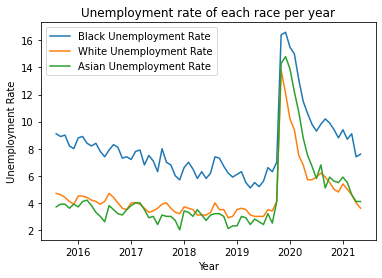

In [19]:
#Creates a line graph of the unemployment rate of each race every year
fig, ax = plt.subplots()
year_month.plot('Month', ['Black Unemployment Rate', 'White Unemployment Rate', 'Asian Unemployment Rate'], ax=ax)

#Sets the x-axis ticks and label for the graph
plt.xticks(ticks=range(5, 70, 12), labels = year_month.index.unique())
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment Rate')

ax.set_title('Unemployment rate of each race per year')
plt.savefig('plots/racial_unemployment_rate_per_year.png')
plt.show()

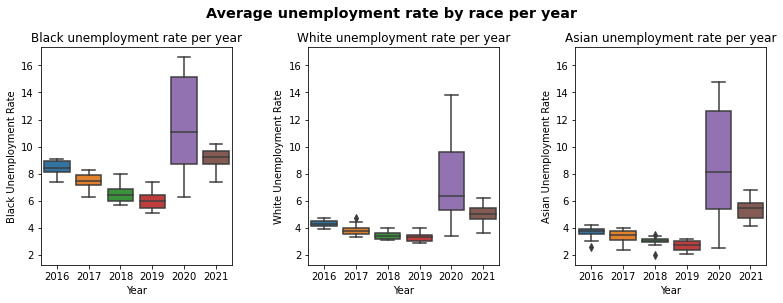

In [20]:
#Creates 3 boxplots of the unemployment rate for each race per year
fig, axes = plt.subplots(1, 3, sharey=True, gridspec_kw={'wspace': .4}, figsize=(13, 4))
sns.boxplot(ax=axes[0], data=racial_unemployment, x='Year', y='Black Unemployment Rate')
sns.boxplot(ax=axes[1], data=racial_unemployment, x='Year', y='White Unemployment Rate')
sns.boxplot(ax=axes[2], data=racial_unemployment, x='Year', y='Asian Unemployment Rate')

#Shows the y-axis ticks for every graph
axes[0].tick_params(axis='y', labelleft=True)
axes[1].tick_params(axis='y', labelleft=True)
axes[2].tick_params(axis='y', labelleft=True)

#Sets the title of each individual subplot
axes[0].set_title('Black unemployment rate per year')
axes[1].set_title('White unemployment rate per year')
axes[2].set_title('Asian unemployment rate per year')

plt.suptitle('Average unemployment rate by race per year', y=1.02, weight='semibold', size='x-large')
plt.savefig('plots/racial_unemployment_boxplot_per_year.png')
plt.show()

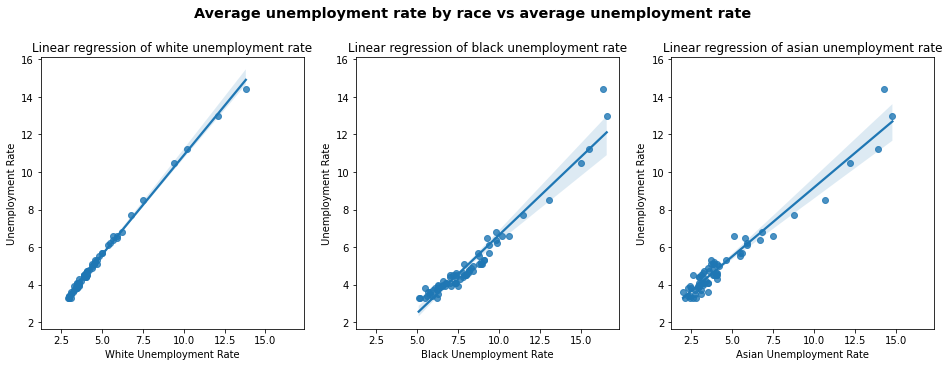

In [21]:
#Creates a regression plot to show the correlation between the national unemployment rate and the unemployment rate 
#for each race
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16, 5))
sns.regplot(ax=axes[0], data=racial_unemployment, x='White Unemployment Rate', y='Unemployment Rate')
sns.regplot(ax=axes[1], data=racial_unemployment, x='Black Unemployment Rate', y='Unemployment Rate')
sns.regplot(ax=axes[2], data=racial_unemployment, x='Asian Unemployment Rate', y='Unemployment Rate')

#Shows the y-axis ticks for every graph
axes[1].tick_params(axis='y', labelleft=True)
axes[2].tick_params(axis='y', labelleft=True)

#Sets the title of each individual subplot
axes[0].set_title('Linear regression of white unemployment rate')
axes[1].set_title('Linear regression of black unemployment rate')
axes[2].set_title('Linear regression of asian unemployment rate')

plt.suptitle('Average unemployment rate by race vs average unemployment rate', y=1.02, weight='semibold', size='x-large')
plt.savefig('plots/racial_unemployment_rate_vs_national.png')
plt.show()